In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import warnings
from itertools import combinations
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
files.upload()

In [ ]:
sur = pd.read_csv("colon.csv")

In [ ]:
sur.head()

,Unnamed: 0,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
0,1,1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2
1,2,1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1
2,3,2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,2
3,4,2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,1
4,5,3,1,Obs,0,71,0,0,1,7.0,1,2.0,2,0,1,963,2


In [ ]:
sur.isnull().sum()

Unnamed: 0     0
id             0
study          0
rx             0
sex            0
age            0
obstruct       0
perfor         0
adhere         0
nodes         36
status         0
differ        46
extent         0
surg           0
node4          0
time           0
etype          0
dtype: int64

In [ ]:
sur.shape

(1858, 17)

In [ ]:
sur = sur.dropna()

In [ ]:
sur.isnull().sum()

Unnamed: 0    0
id            0
study         0
rx            0
sex           0
age           0
obstruct      0
perfor        0
adhere        0
nodes         0
status        0
differ        0
extent        0
surg          0
node4         0
time          0
etype         0
dtype: int64

In [ ]:
sur['rx'].value_counts()

Obs        610
Lev        588
Lev+5FU    578
Name: rx, dtype: int64

In [ ]:
sur["differ"].unique()

array([2., 3., 1.])

In [ ]:
sur["differ"].count()

1776

In [ ]:
sur = sur.drop(columns=["Unnamed: 0","study"])

In [ ]:
sur.head()

,id,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
0,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2
1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1
2,2,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,2
3,2,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,1
4,3,Obs,0,71,0,0,1,7.0,1,2.0,2,0,1,963,2


In [ ]:
bins=[0,40,60,80,100]
labels =['0-40','40-60','60-80','80-100']
sur["age_range"] = pd.cut(sur['age'], labels=labels, bins=bins,right=False)

In [ ]:
sur_rec = sur[sur['etype']==1]
sur_dth = sur[sur['etype']==2]

In [ ]:
sur['differ'].unique()

array([2., 3., 1.])

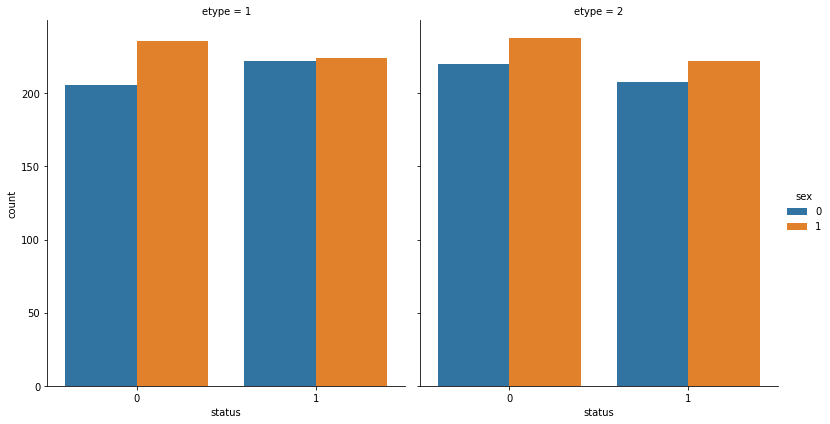

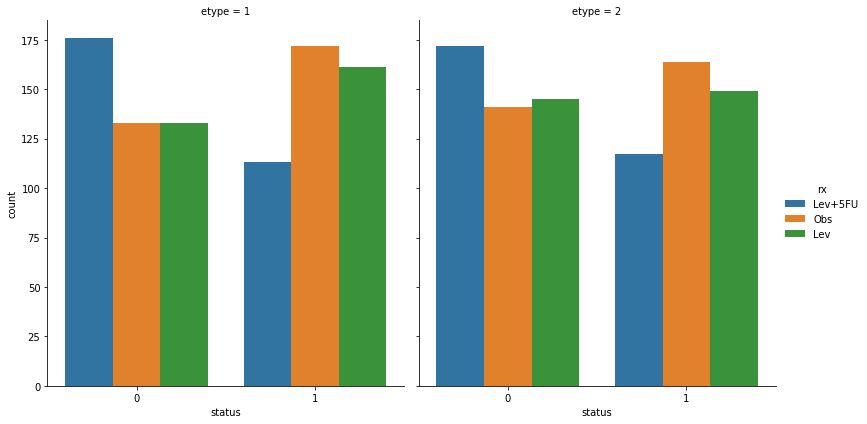

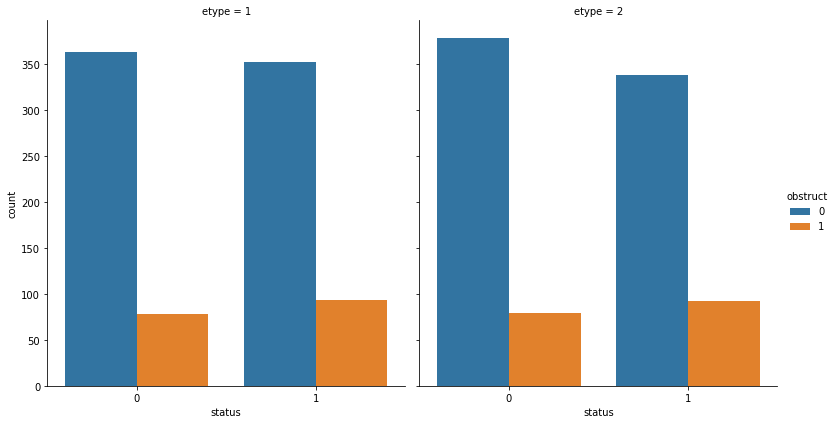

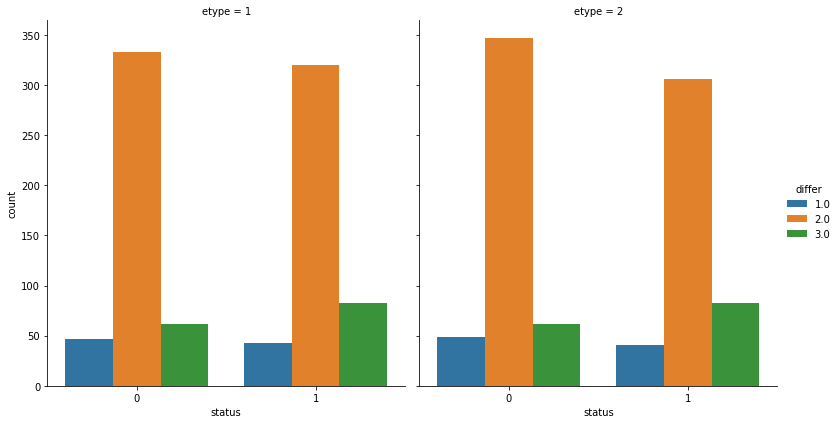

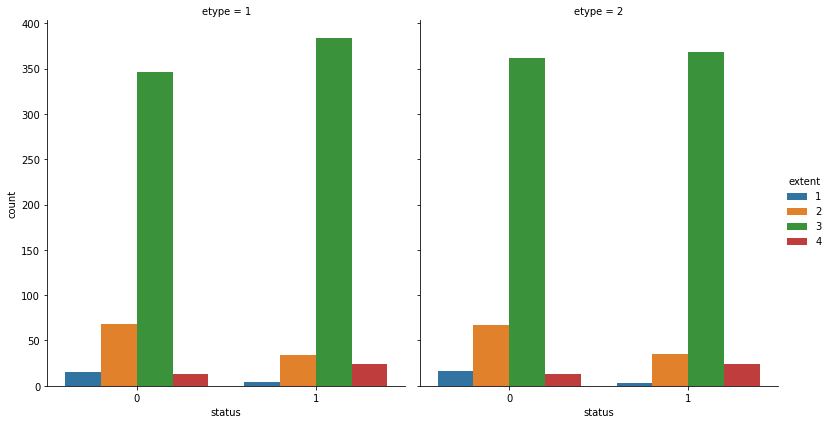

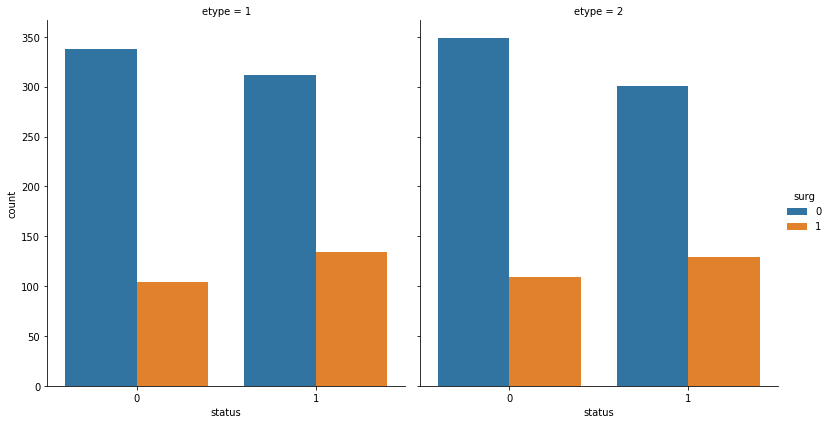

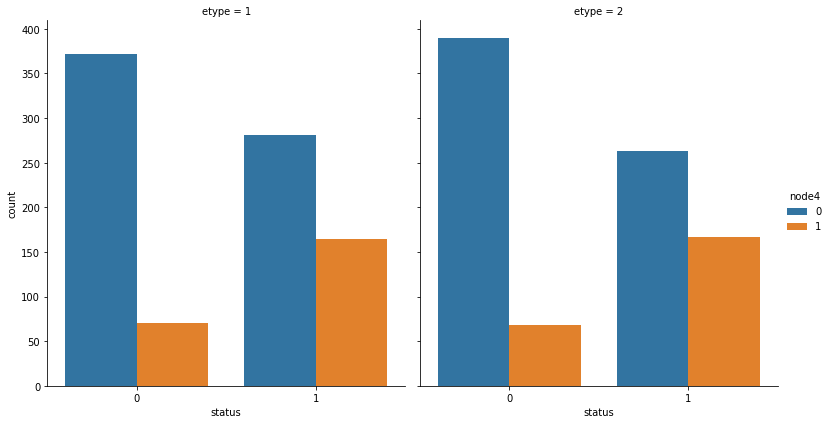

In [ ]:
feature = ['sex', 'rx', 'obstruct', 'differ', 'extent', 'surg', 'node4']

for item in feature:
  g = sns.catplot(x="status", hue=item, col="etype",
                data=sur, kind="count",
                height=6, aspect=.9);
  #plt.title(f"\nComparison between different '{item}' for both the event Recurrenece and Death\n", fontsize=15)
  

# RECURRENCE

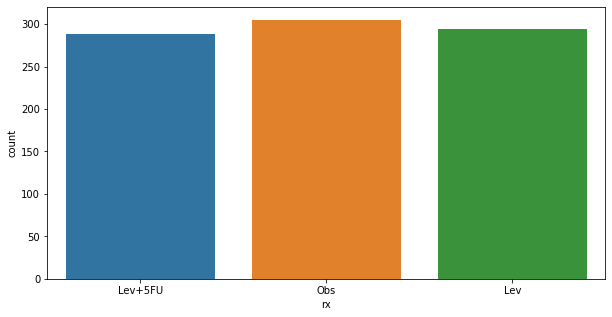

In [ ]:
plt.figure(figsize=[10,5])
ax = sns.countplot(sur_rec['rx'])

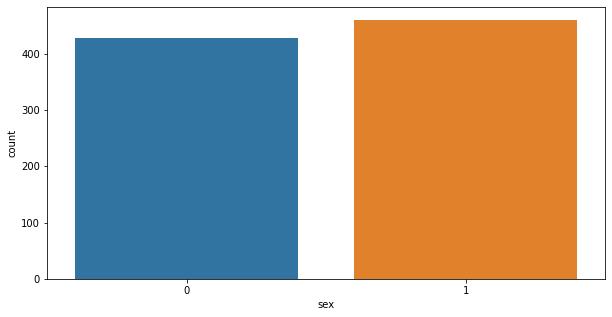

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x='sex',data=sur_rec)

In [ ]:
print(sur_rec.columns)

Index(['id', 'rx', 'sex', 'age', 'obstruct', 'perfor', 'adhere', 'nodes',
       'status', 'differ', 'extent', 'surg', 'node4', 'time', 'etype',
       'age_range'],
      dtype='object')


In [ ]:
names = ['rx', 'sex', 'obstruct', 'perfor', 'adhere', 'nodes',
       'status', 'differ', 'extent', 'surg', 'node4']

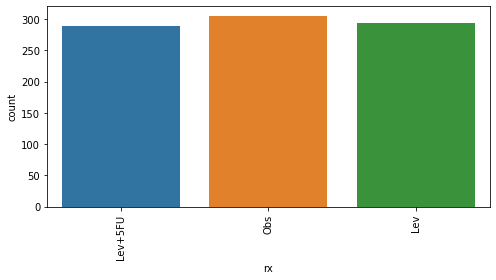

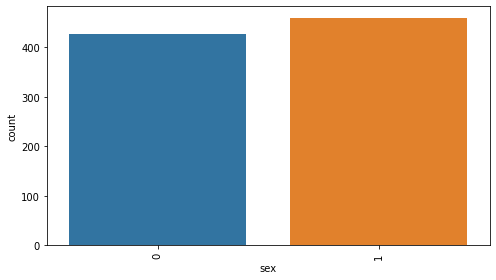

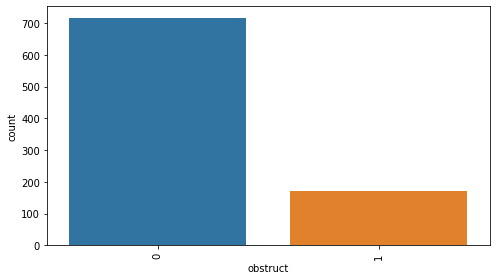

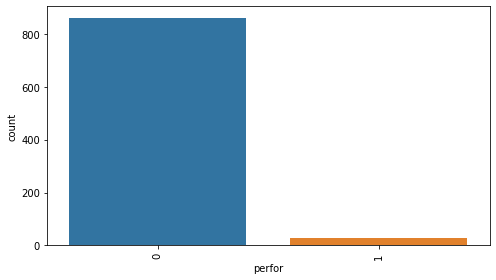

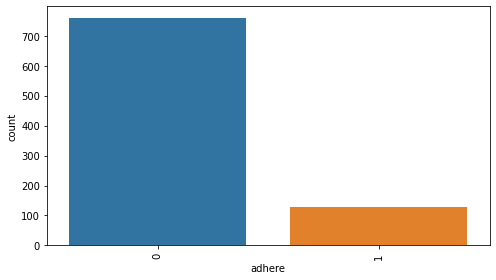

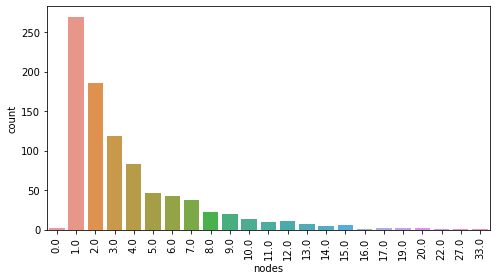

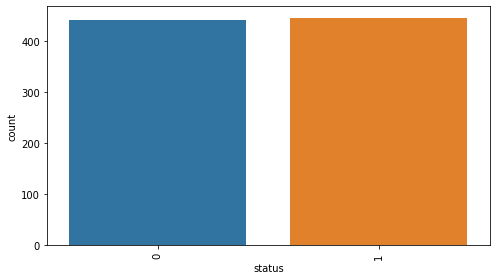

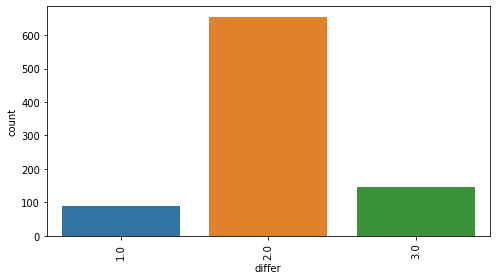

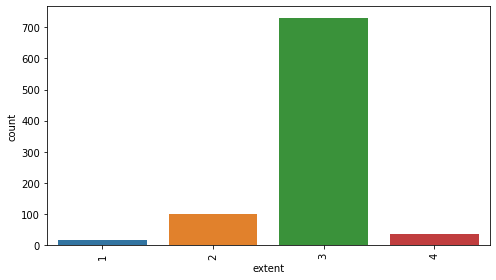

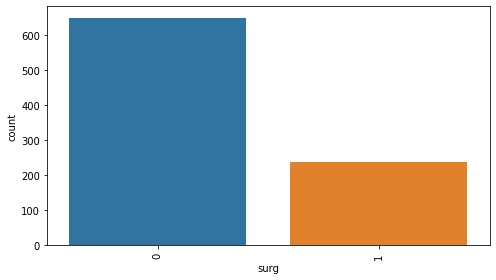

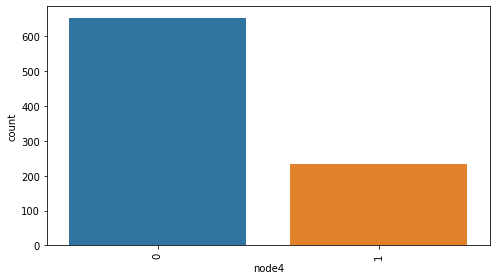

In [ ]:
for feature in names:
    
    plt.figure(figsize=(7,4))
    sns.countplot(sur_rec[feature])
    plt.xticks(rotation=90, horizontalalignment='center')


    plt.tight_layout()
    plt.show()

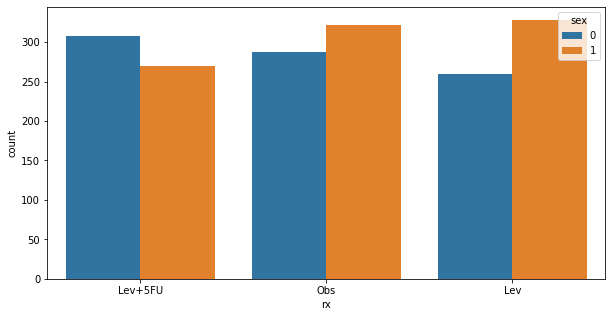

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x='rx', data=sur,hue = 'sex')



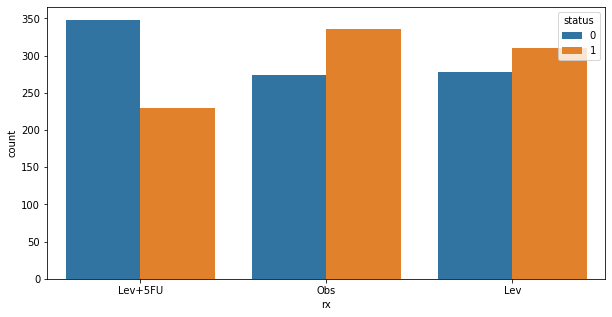

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x='rx', data=sur,hue = 'status')

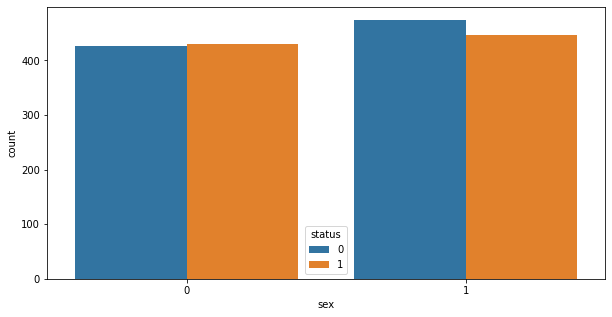

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x='sex', data=sur,hue = 'status')

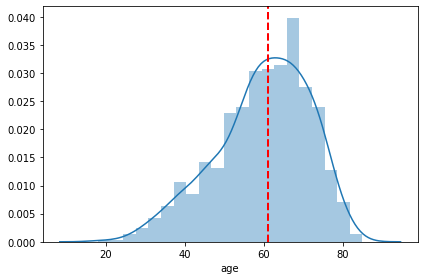

In [ ]:
sns.distplot(sur_rec['age'])
plt.axvline(sur_rec["age"].median(),color='r',linestyle='--',linewidth=2)
plt.tight_layout()

In [ ]:
sur.age.describe()

count    1776.000000
mean       59.810811
std        11.911137
min        18.000000
25%        53.000000
50%        61.000000
75%        69.000000
max        85.000000
Name: age, dtype: float64

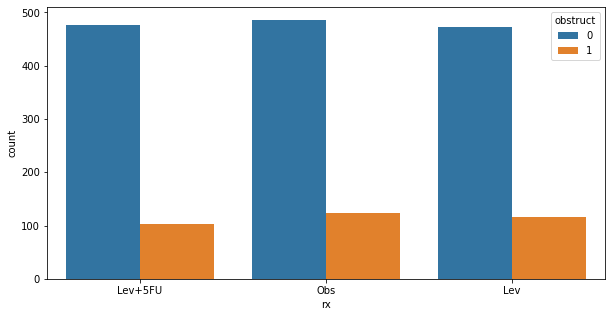

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x='rx', data=sur,hue = 'obstruct')

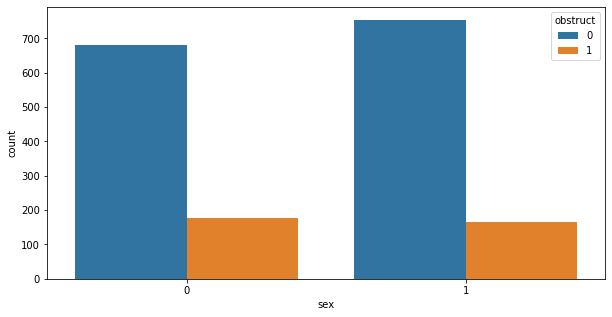

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(x='sex', data=sur,hue = 'obstruct')

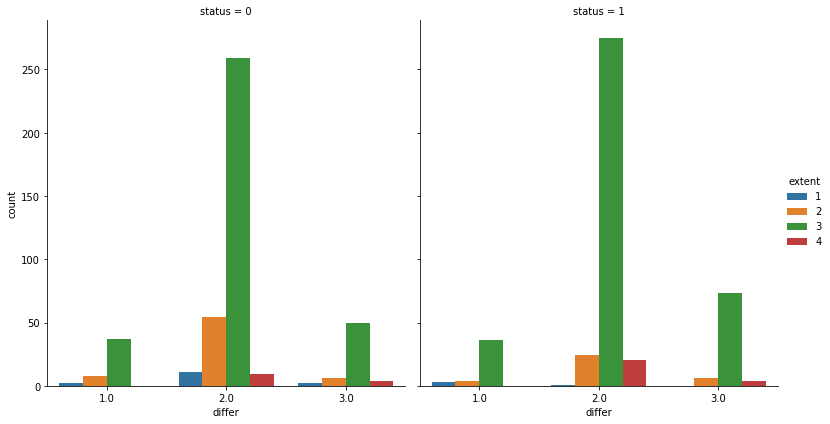

In [ ]:
g = sns.catplot(x="differ", hue="extent", col="status",
                data=sur_rec, kind="count",
                height=6, aspect=.9);
#plt.title(f"\nComparison between different 'extent' on the basis of 'differentiation of tumor' for the event Recurrenece\n\n", fontsize=15, horizontalalignment='right')

In [ ]:
names_dth = ['rx', 'sex', 'obstruct', 'perfor', 'adhere', 'nodes',
       'status', 'differ', 'extent', 'surg', 'node4']

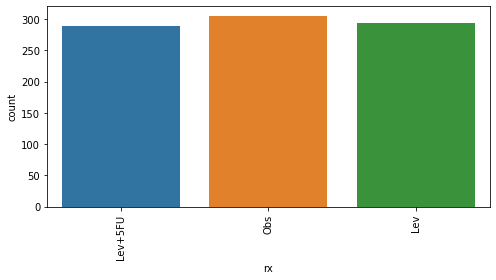

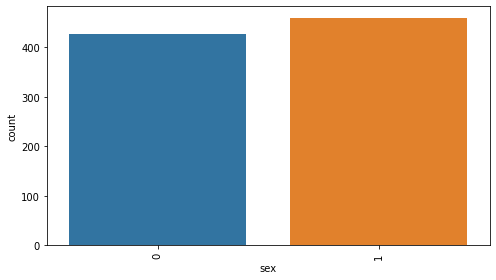

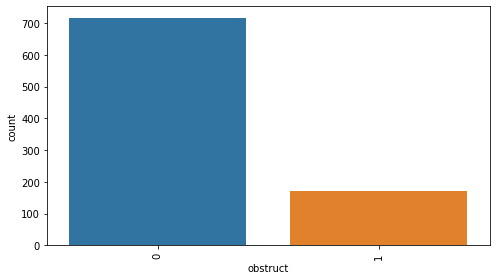

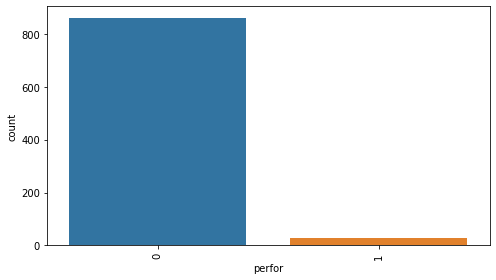

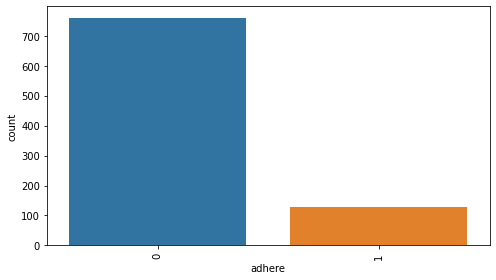

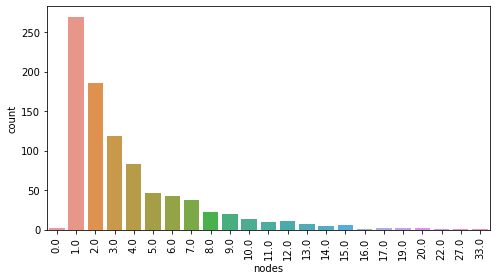

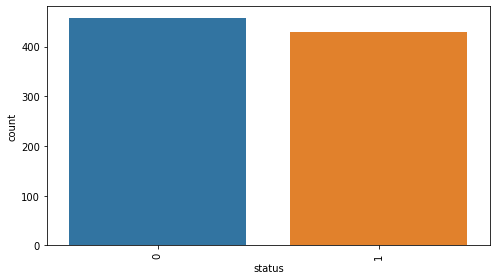

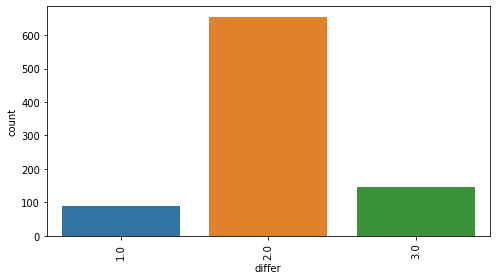

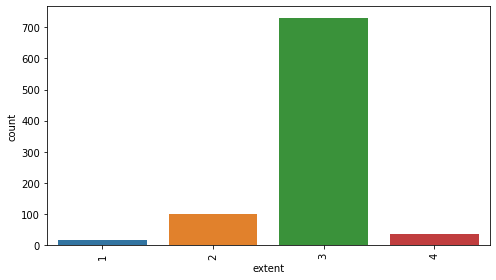

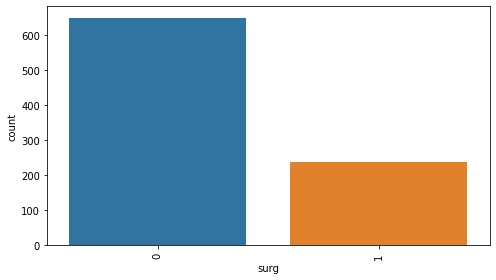

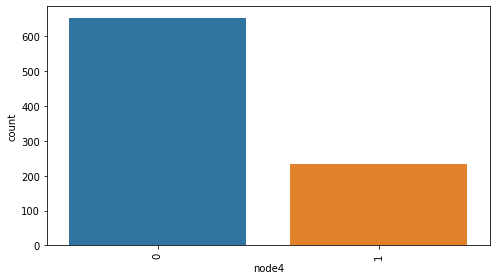

In [ ]:

for feature in names_dth:
    
    plt.figure(figsize=(7,4))
    sns.countplot(sur_dth[feature])
    plt.xticks(rotation=90, horizontalalignment='center')
    plt.tight_layout()
    plt.show()

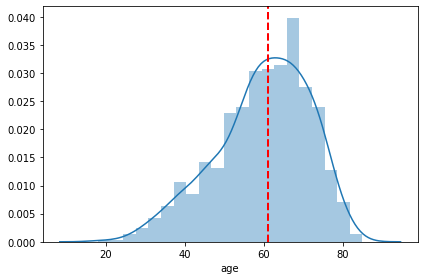

In [ ]:
sns.distplot(sur_dth['age'])
plt.axvline(sur_dth["age"].median(),color='r',linestyle='--',linewidth=2)
plt.tight_layout()

In [ ]:
!pip install lifelines

     |████████████████████████████████| 348kB 2.8MB/s 


In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

Text(0.5, 1.0, 'Colon Cancer Death - Node Count')

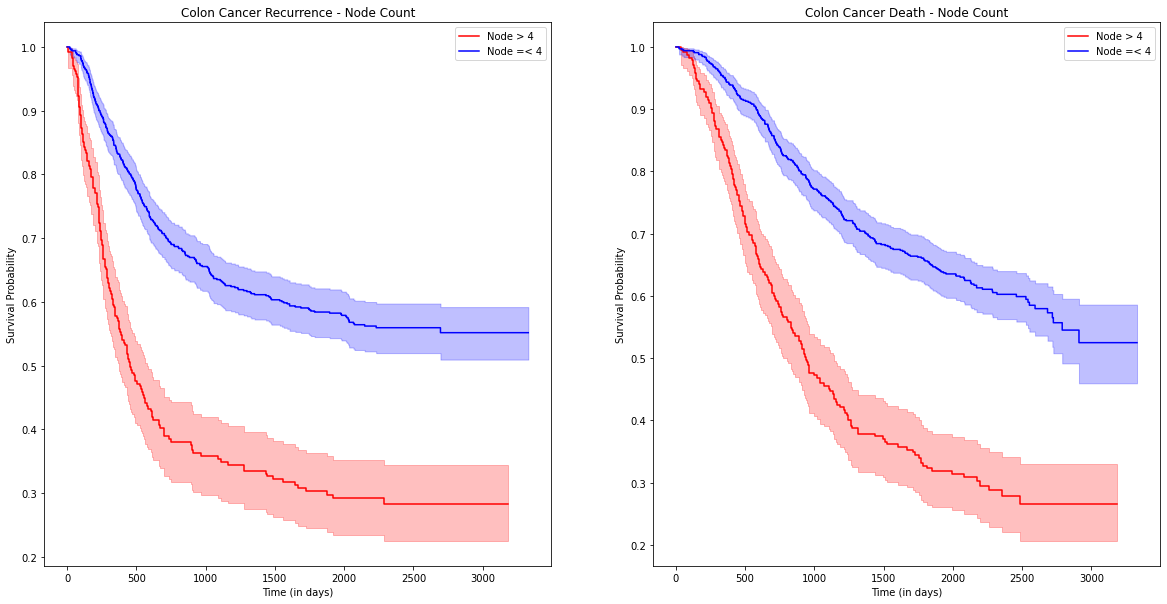

In [ ]:
recur_kmf_node1, recur_kmf_node2 = KaplanMeierFitter(), KaplanMeierFitter()
recur_df_node1 = sur_rec[sur_rec['node4']==1]
recur_df_node2 = sur_rec[sur_rec['node4']==0]


recur_kmf_node1.fit(recur_df_node1['time'], recur_df_node1['status'])
recur_kmf_node2.fit(recur_df_node2['time'], recur_df_node2['status'])

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = recur_kmf_node1.plot(color='red', label='Node > 4')
ax_2 = recur_kmf_node2.plot(color='blue', label='Node =< 4')
ax_2.set_xlabel('Time (in days)')
ax_2.set_ylabel('Survival Probability')
ax_2.set_title('Colon Cancer Recurrence - Node Count')
# plt.savefig('relapse_males_vs_females.png', dpi=300, bbox_inches='tight')

#______________________________________________________________________________________

dth_kmf_node1, dth_kmf_node2 = KaplanMeierFitter(), KaplanMeierFitter()
dth_df_node1 = sur_dth[sur_dth['node4']==1]
dth_df_node2 = sur_dth[sur_dth['node4']==0]


dth_kmf_node1.fit(dth_df_node1['time'], dth_df_node1['status'])
dth_kmf_node2.fit(dth_df_node2['time'], dth_df_node2['status'])

plt.subplot(1,2,2)
ax = dth_kmf_node1.plot(color='red', label='Node > 4')
ax_2 = dth_kmf_node2.plot(color='blue', label='Node =< 4')
ax_2.set_xlabel('Time (in days)')
ax_2.set_ylabel('Survival Probability')
ax_2.set_title('Colon Cancer Death - Node Count')


In [ ]:
dth_kmf_node1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,235,235
34.0,1,1,0,0,235
52.0,1,1,0,0,234
79.0,1,1,0,0,233
93.0,1,1,0,0,232
...,...,...,...,...,...
2828.0,1,0,1,0,5
2883.0,1,0,1,0,4
2941.0,1,0,1,0,3


In [ ]:
# Death - Node Count - Log Rank test
_ = logrank_test(dth_df_node1['time'], dth_df_node2['time'], dth_df_node1['status'], dth_df_node2['status'])
_.summary

,test_statistic,p
0,99.445001,2.016873e-23


In [ ]:
# Recurrence - Node Count - Log Rank test
_ = logrank_test(recur_df_node1['time'], recur_df_node2['time'], recur_df_node1['status'], recur_df_node2['status'])
_.summary

,test_statistic,p
0,82.934367,8.482355e-20


Text(0.5, 1.0, 'Death from Colon Cancer')

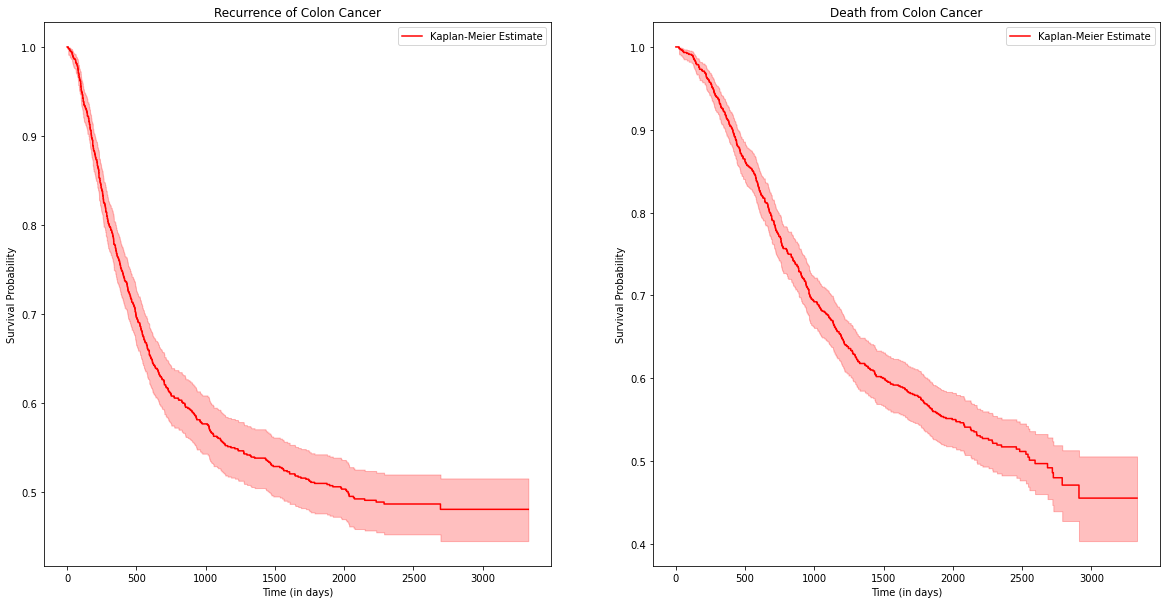

In [ ]:
recur_kmf = KaplanMeierFitter()
recur_kmf.fit(sur_rec['time'], sur_rec['status'])

plt.figure(figsize=(20,10))


plt.subplot(1,2,1)
ax = recur_kmf.plot(color='red', label='Kaplan-Meier Estimate')
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Survival Probability')
ax.set_title('Recurrence of Colon Cancer')

#________________________________________________________________________________
dth_kmf = KaplanMeierFitter()
dth_kmf.fit(sur_dth['time'], sur_dth['status'])

plt.subplot(1,2,2)
ax = dth_kmf.plot(color='red', label='Kaplan-Meier Estimate')
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Survival Probability')
ax.set_title('Death from Colon Cancer')


Text(0.5, 1.0, 'Colon Cancer Death - Males vs Females')

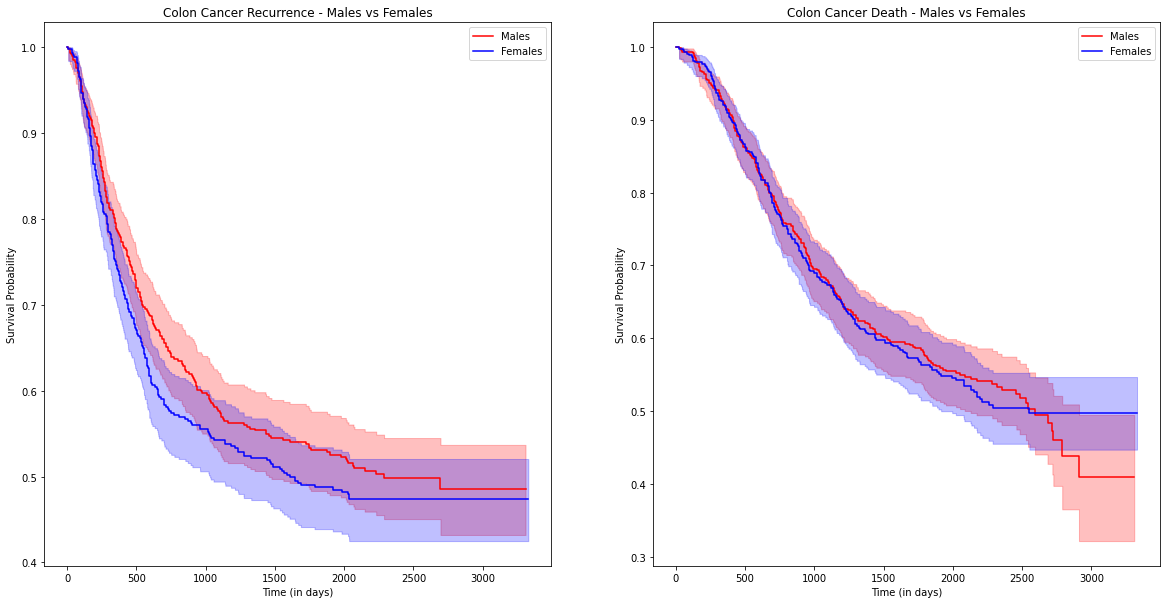

In [ ]:
recur_kmf_male, recur_kmf_female = KaplanMeierFitter(), KaplanMeierFitter()
recur_df_male = sur_rec[sur_rec['sex']==1]
recur_df_female = sur_rec[sur_rec['sex']==0]


recur_kmf_male.fit(recur_df_male['time'], recur_df_male['status'])
recur_kmf_female.fit(recur_df_female['time'], recur_df_female['status'])

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = recur_kmf_male.plot(color='red', label='Males')
ax_2 = recur_kmf_female.plot(color='blue', label='Females')
ax_2.set_xlabel('Time (in days)')
ax_2.set_ylabel('Survival Probability')
ax_2.set_title('Colon Cancer Recurrence - Males vs Females')
# plt.savefig('relapse_males_vs_females.png', dpi=300, bbox_inches='tight')

#______________________________________________________________________________________

dth_kmf_male, dth_kmf_female = KaplanMeierFitter(), KaplanMeierFitter()
dth_df_male = sur_dth[sur_dth['sex']==1]
dth_df_female = sur_dth[sur_dth['sex']==0]


dth_kmf_male.fit(dth_df_male['time'], dth_df_male['status'])
dth_kmf_female.fit(dth_df_female['time'], dth_df_female['status'])

plt.subplot(1,2,2)
ax = dth_kmf_male.plot(color='red', label='Males')
ax_2 = dth_kmf_female.plot(color='blue', label='Females')
ax_2.set_xlabel('Time (in days)')
ax_2.set_ylabel('Survival Probability')
ax_2.set_title('Colon Cancer Death - Males vs Females')
# plt.savefig('relapse_males_vs_females.png', dpi=300, bbox_inches='tight')


In [ ]:
# Recurrence - Males vs Females - Log Rank test
_ = logrank_test(recur_df_male['time'], recur_df_female['time'], recur_df_male['status'], recur_df_female['status'])
_.summary

,test_statistic,p
0,1.419515,0.233483


In [ ]:
# Deaths - Males vs Females - Log Rank test
_ = logrank_test(dth_df_male['time'], dth_df_female['time'], dth_df_male['status'], dth_df_female['status'])
_.summary

,test_statistic,p
0,0.006486,0.935812


Text(0.5, 1.0, 'Colon Cancer Deaths - Treatment Types')

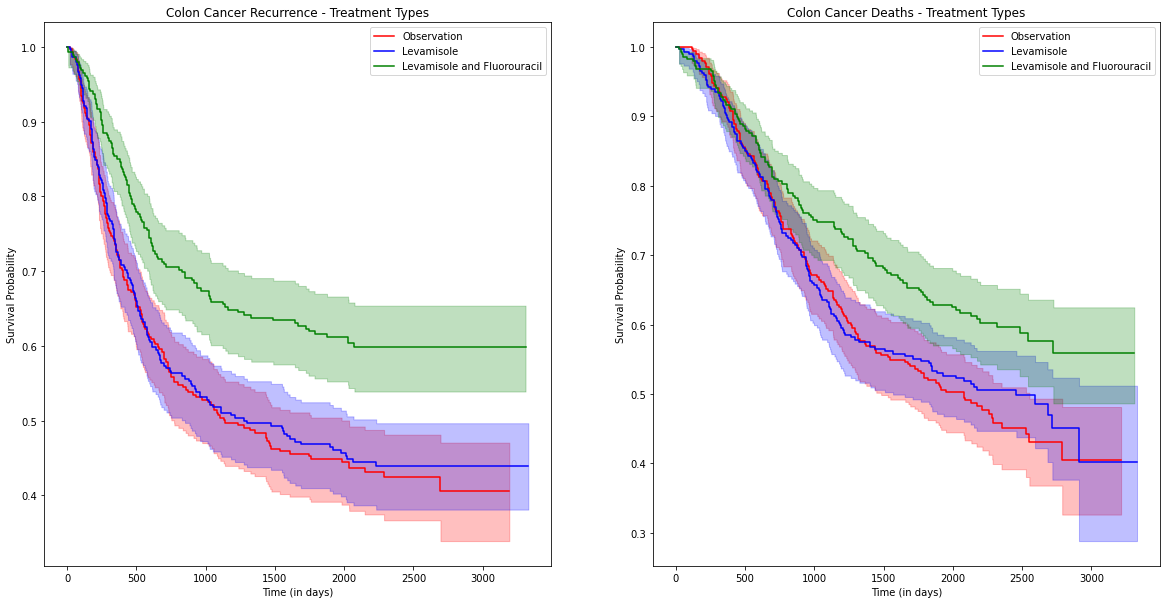

In [ ]:
recur_kmf_1, recur_kmf_2, recur_kmf_3 = KaplanMeierFitter(), KaplanMeierFitter(), KaplanMeierFitter()
# Subset on treatment levels
recur_rx_1 = sur_rec[sur_rec['rx']=='Obs']
recur_rx_2 = sur_rec[sur_rec['rx']=='Lev']
recur_rx_3 = sur_rec[sur_rec['rx']=='Lev+5FU']


recur_kmf_1.fit(recur_rx_1['time'], recur_rx_1['status'])
recur_kmf_2.fit(recur_rx_2['time'], recur_rx_2['status'])
recur_kmf_3.fit(recur_rx_3['time'], recur_rx_3['status'])

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = recur_kmf_1.plot(color='red', label='Observation')
ax2 = recur_kmf_2.plot(color='blue', label='Levamisole')
ax3 = recur_kmf_3.plot(color='green', label='Levamisole and Fluorouracil')

ax3.set_xlabel('Time (in days)')
ax3.set_ylabel('Survival Probability')
ax3.set_title('Colon Cancer Recurrence - Treatment Types')



deaths_kmf_1, deaths_kmf_2, deaths_kmf_3 = KaplanMeierFitter(), KaplanMeierFitter(), KaplanMeierFitter()
# Subset on treatment levels
deaths_rx_1 = sur_dth[sur_dth['rx']=='Obs']
deaths_rx_2 = sur_dth[sur_dth['rx']=='Lev']
deaths_rx_3 = sur_dth[sur_dth['rx']=='Lev+5FU']


deaths_kmf_1.fit(deaths_rx_1['time'], deaths_rx_1['status'])
deaths_kmf_2.fit(deaths_rx_2['time'], deaths_rx_2['status'])
deaths_kmf_3.fit(deaths_rx_3['time'], deaths_rx_3['status'])


plt.subplot(1,2,2)

deaths_kmf_1.plot(color='red', label='Observation')
deaths_kmf_2.plot(color='blue', label='Levamisole')
ax = deaths_kmf_3.plot(color='green', label='Levamisole and Fluorouracil')

ax.set_xlabel('Time (in days)')
ax.set_ylabel('Survival Probability')
ax.set_title('Colon Cancer Deaths - Treatment Types')


In [ ]:
# Deaths - treatment type - Log Rank test

for i, j in combinations([deaths_rx_1, deaths_rx_2, deaths_rx_3], 2):
    _ = logrank_test(i['time'], j['time'], i['status'], j['status'])
    print(_.summary, '   ', i['rx'].unique()[0], 'and ', j['rx'].unique()[0])

   test_statistic         p
0        0.299226  0.584368     Obs and  Lev
   test_statistic         p
0       10.252675  0.001365     Obs and  Lev+5FU
   test_statistic         p
0        6.596655  0.010217     Lev and  Lev+5FU


In [ ]:
# Recurrence - treatment type - Log Rank test

for i, j in combinations([recur_rx_1, recur_rx_2, recur_rx_3], 2):
    _ = logrank_test(i['time'], j['time'], i['status'], j['status'])
    print(_.summary,'   ', i['differ'].unique()[0], 'and ', j['differ'].unique()[0])

   test_statistic         p
0          0.1365  0.711786     2.0 and  2.0
   test_statistic         p
0       19.122169  0.000012     2.0 and  2.0
   test_statistic         p
0       15.770674  0.000072     2.0 and  2.0


Text(0.5, 1.0, 'Colon Cancer Deaths - Extent of Spread of Tumour')

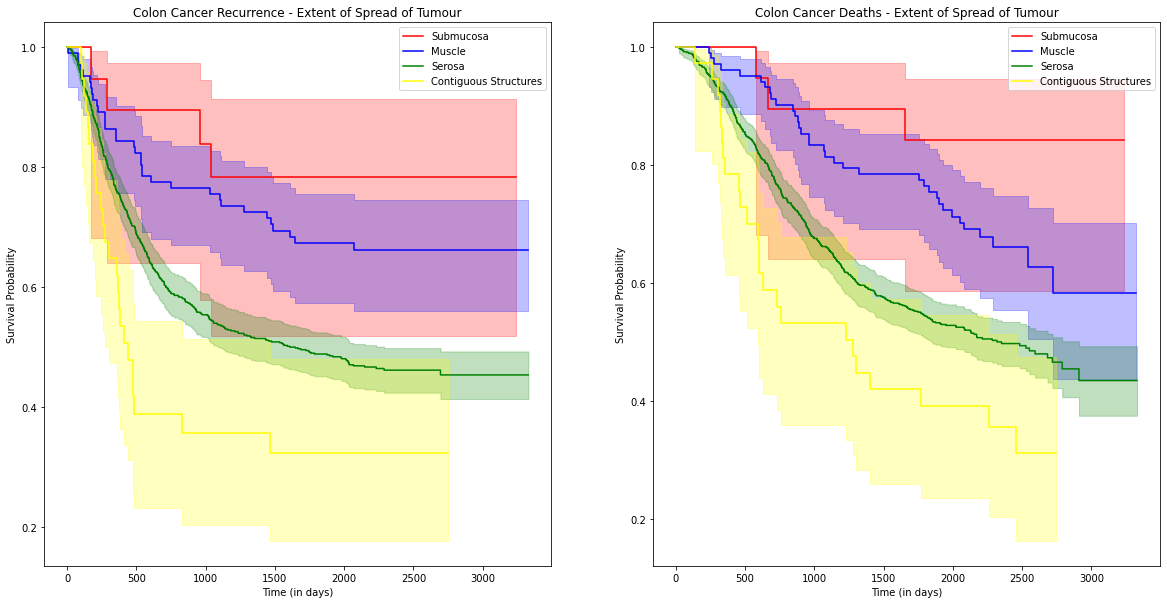

In [ ]:
recur_kmf_1, recur_kmf_2, recur_kmf_3, recur_kmf_4 = KaplanMeierFitter(), KaplanMeierFitter(), \
                                                    KaplanMeierFitter(), KaplanMeierFitter()
# Subset on treatment levels
recur_ext_1 = sur_rec[sur_rec['extent']==1]
recur_ext_2 = sur_rec[sur_rec['extent']==2]
recur_ext_3 = sur_rec[sur_rec['extent']==3]
recur_ext_4 = sur_rec[sur_rec['extent']==4]


recur_kmf_1.fit(recur_ext_1['time'], recur_ext_1['status'])
recur_kmf_2.fit(recur_ext_2['time'], recur_ext_2['status'])
recur_kmf_3.fit(recur_ext_3['time'], recur_ext_3['status'])
recur_kmf_4.fit(recur_ext_4['time'], recur_ext_4['status'])

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
recur_kmf_1.plot(color='red', label='Submucosa')
recur_kmf_2.plot(color='blue', label='Muscle')
recur_kmf_3.plot(color='green', label='Serosa')
ax = recur_kmf_4.plot(color='yellow', label='Contiguous Structures')
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Survival Probability')
ax.set_title('Colon Cancer Recurrence - Extent of Spread of Tumour')

# plt.savefig('relapse_different_extents.png', dpi=300, bbox_inches='tight')



deaths_kmf_1, deaths_kmf_2, deaths_kmf_3, deaths_kmf_4 = KaplanMeierFitter(), KaplanMeierFitter(), \
                                                    KaplanMeierFitter(), KaplanMeierFitter()
# Subset on treatment levels
deaths_ext_1 = sur_dth[sur_dth['extent']==1]
deaths_ext_2 = sur_dth[sur_dth['extent']==2]
deaths_ext_3 = sur_dth[sur_dth['extent']==3]
deaths_ext_4 = sur_dth[sur_dth['extent']==4]


deaths_kmf_1.fit(deaths_ext_1['time'], deaths_ext_1['status'])
deaths_kmf_2.fit(deaths_ext_2['time'], deaths_ext_2['status'])
deaths_kmf_3.fit(deaths_ext_3['time'], deaths_ext_3['status'])
deaths_kmf_4.fit(deaths_ext_4['time'], deaths_ext_4['status'])

plt.subplot(1,2,2)

deaths_kmf_1.plot(color='red', label='Submucosa')
deaths_kmf_2.plot(color='blue', label='Muscle')
deaths_kmf_3.plot(color='green', label='Serosa')
ax = deaths_kmf_4.plot(color='yellow', label='Contiguous Structures')
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Survival Probability')
ax.set_title('Colon Cancer Deaths - Extent of Spread of Tumour')

# plt.savefig('deaths_different_extents.png', dpi=300, bbox_inches='tight')


In [ ]:
# Recurrence - treatment type - Log Rank test

for i, j in combinations([deaths_ext_1, deaths_ext_2, deaths_ext_3, deaths_ext_4], 2):
    _ = logrank_test(i['time'], j['time'], i['status'], j['status'])
    print(_.summary,'   ', i['extent'].unique()[0], 'and ', j['extent'].unique()[0])

   test_statistic         p
0        2.409521  0.120599     1 and  2
   test_statistic         p
0        7.308426  0.006863     1 and  3
   test_statistic         p
0       11.651118  0.000642     1 and  4
   test_statistic         p
0       10.682074  0.001082     2 and  3
   test_statistic        p
0       16.859804  0.00004     2 and  4
   test_statistic         p
0        4.971242  0.025772     3 and  4


In [ ]:
# Recurrence - treatment type - Log Rank test

for i, j in combinations([recur_ext_1, recur_ext_2, recur_ext_3, recur_ext_4], 2):
    _ = logrank_test(i['time'], j['time'], i['status'], j['status'])
    print(_.summary,'   ', i['extent'].unique()[0], 'and ', j['extent'].unique()[0])

   test_statistic         p
0        0.998545  0.317663     1 and  2
   test_statistic         p
0        5.975471  0.014506     1 and  3
   test_statistic         p
0       10.203182  0.001402     1 and  4
   test_statistic         p
0       12.662975  0.000373     2 and  3
   test_statistic         p
0        18.10915  0.000021     2 and  4
   test_statistic         p
0         5.93923  0.014807     3 and  4


In [ ]:
sur['differ'].unique()

array([2., 3., 1.])

Text(0.5, 1.0, 'Colon Cancer Deaths - Differentiation of Tumour')

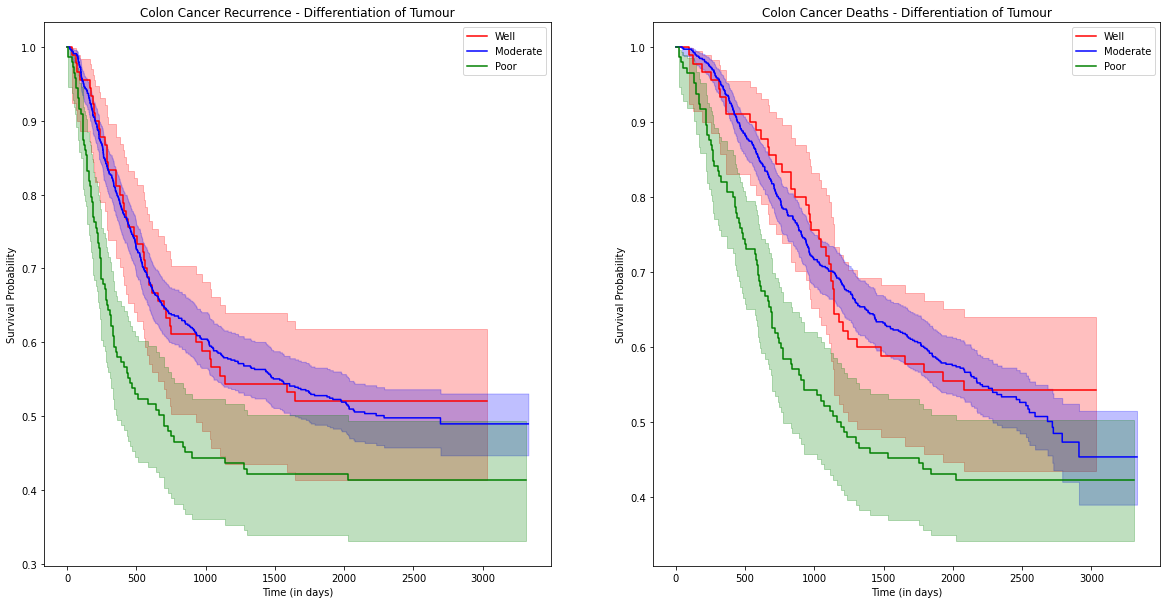

In [ ]:
recur_kmf_1, recur_kmf_2, recur_kmf_3 = KaplanMeierFitter(), KaplanMeierFitter(), KaplanMeierFitter()
# Subset on treatment levels
recur_dif_1 = sur_rec[sur_rec['differ']==1]
recur_dif_2 = sur_rec[sur_rec['differ']==2]
recur_dif_3 = sur_rec[sur_rec['differ']==3]


recur_kmf_1.fit(recur_dif_1['time'], recur_dif_1['status'])
recur_kmf_2.fit(recur_dif_2['time'], recur_dif_2['status'])
recur_kmf_3.fit(recur_dif_3['time'], recur_dif_3['status'])

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = recur_kmf_1.plot(color='red', label='Well')
ax2 = recur_kmf_2.plot(color='blue', label='Moderate')
ax3 = recur_kmf_3.plot(color='green', label='Poor')

ax3.set_xlabel('Time (in days)')
ax3.set_ylabel('Survival Probability')
ax3.set_title('Colon Cancer Recurrence - Differentiation of Tumour')



deaths_kmf_1, deaths_kmf_2, deaths_kmf_3 = KaplanMeierFitter(), KaplanMeierFitter(), KaplanMeierFitter()
# Subset on treatment levels
deaths_dif_1 = sur_dth[sur_dth['differ']==1]
deaths_dif_2 = sur_dth[sur_dth['differ']==2]
deaths_dif_3 = sur_dth[sur_dth['differ']==3]


deaths_kmf_1.fit(deaths_dif_1['time'], deaths_dif_1['status'])
deaths_kmf_2.fit(deaths_dif_2['time'], deaths_dif_2['status'])
deaths_kmf_3.fit(deaths_dif_3['time'], deaths_dif_3['status'])


plt.subplot(1,2,2)

deaths_kmf_1.plot(color='red', label='Well')
deaths_kmf_2.plot(color='blue', label='Moderate')
ax = deaths_kmf_3.plot(color='green', label='Poor')

ax.set_xlabel('Time (in days)')
ax.set_ylabel('Survival Probability')
ax.set_title('Colon Cancer Deaths - Differentiation of Tumour')


In [ ]:
# Recurrence - treatment type - Log Rank test

for i, j in combinations([deaths_dif_1, deaths_dif_2, deaths_dif_3], 2):
    _ = logrank_test(i['time'], j['time'], i['status'], j['status'])
    print(_.summary,'   ', i['differ'].unique()[0], 'and ', j['differ'].unique()[0])

   test_statistic         p
0        0.049494  0.823945     1.0 and  2.0
   test_statistic         p
0        5.722612  0.016748     1.0 and  3.0
   test_statistic         p
0       12.699754  0.000366     2.0 and  3.0


In [ ]:
# Recurrence - treatment type - Log Rank test

for i, j in combinations([recur_dif_1, recur_dif_2, recur_dif_3], 2):
    _ = logrank_test(i['time'], j['time'], i['status'], j['status'])
    print(_.summary,'   ', i['differ'].unique()[0], 'and ', j['differ'].unique()[0])

   test_statistic         p
0        0.075845  0.783009     1.0 and  2.0
   test_statistic        p
0        5.039201  0.02478     1.0 and  3.0
   test_statistic        p
0       10.475503  0.00121     2.0 and  3.0


In [ ]:
from lifelines import CoxPHFitter

In [ ]:
cph = CoxPHFitter()

In [ ]:
sex = pd.DataFrame(sur.groupby(['rx','sex']).sex.apply(lambda x : x.count()*100)/sur.groupby('rx').sex.apply(lambda x: x.count()))
sex

sex
rx      sex           
Lev     0    44.217687
        1    55.782313
Lev+5FU 0    53.287197
        1    46.712803
Obs     0    47.213115
        1    52.786885

### 

In [ ]:
obstruct = pd.DataFrame(sur.groupby(['rx','obstruct']).obstruct.apply(lambda x : x.count()*100)/sur.groupby('rx').obstruct.apply(lambda x: x.count()))
obstruct

obstruct
rx      obstruct           
Lev     0         80.272109
        1         19.727891
Lev+5FU 0         82.352941
        1         17.647059
Obs     0         79.672131
        1         20.327869

In [ ]:
bins=[0,40,60,80,100]
labels =['0-40','40-60','60-80','80-100']
sur["age_range"] = pd.cut(sur['age'], labels=labels, bins=bins,right=False)

In [ ]:
sur.age_range

0       40-60
1       40-60
2       60-80
3       60-80
4       60-80
        ...  
1853    60-80
1854    40-60
1855    40-60
1856    60-80
1857    60-80
Name: age_range, Length: 1776, dtype: category
Categories (4, object): [0-40 < 40-60 < 60-80 < 80-100]

In [ ]:
pd.DataFrame(sur.groupby(['rx','node4']).node4.apply(lambda x : x.count()*100)/sur.groupby('rx').node4.apply(lambda x: x.count()))

node4
rx      node4           
Lev     0      72.448980
        1      27.551020
Lev+5FU 0      75.778547
        1      24.221453
Obs     0      72.459016
        1      27.540984

In [ ]:
pd.DataFrame(sur.groupby(['rx','differ']).differ.apply(lambda x : x.count()*100)/sur.groupby('rx').differ.apply(lambda x: x.count()))

differ
rx      differ           
Lev     1.0     12.585034
        2.0     73.129252
        3.0     14.285714
Lev+5FU 1.0      8.996540
        2.0     73.356401
        3.0     17.647059
Obs     1.0      8.852459
        2.0     74.098361
        3.0     17.049180

In [ ]:
pd.DataFrame(sur.groupby(['rx','extent']).extent.apply(lambda x : x.count()*100)/sur.groupby('rx').extent.apply(lambda x: x.count()))

extent
rx      extent           
Lev     1        1.020408
        2       11.904762
        3       83.673469
        4        3.401361
Lev+5FU 1        3.114187
        2       10.726644
        3       82.698962
        4        3.460208
Obs     1        2.295082
        2       11.803279
        3       80.327869
        4        5.573770

In [ ]:
#Age
pd.DataFrame(sur.groupby(['rx','age_range']).age_range.apply(lambda x : x.count()*100)/sur.groupby('rx').age_range.apply(lambda x: x.count()))

age_range
rx      age_range           
Lev     0-40        6.462585
        40-60      36.394558
        60-80      54.761905
        80-100      2.380952
Lev+5FU 0-40        7.612457
        40-60      35.294118
        60-80      55.709343
        80-100      1.384083
Obs     0-40        7.868852
        40-60      39.016393
        60-80      51.147541
        80-100      1.967213

In [ ]:
#print(sur_rec.groupby(['age_range','status']).time.apply(lambda x: x.mean()))
#
status=sur[sur['status']==1]
status_rec = sur_rec[sur_rec['status']==1]
status_dth = sur_dth[sur_dth['status']==1]


pd.DataFrame(status.groupby(['age_range','etype']).time.apply(lambda x: x.mean()))
#print("--------------------------------------------------------------------")
#print(status_dth.groupby(['age_range']).time.apply(lambda x: x.mean()))

time
age_range etype            
0-40      1      442.710526
          2      910.969697
40-60     1      615.098160
          2      994.557823
60-80     1      546.888889
          2      904.347280
80-100    1      377.909091
          2      664.363636

In [ ]:
pd.DataFrame(status.groupby(['etype','rx']).time.apply(lambda x : x.mean()))

time
etype rx                 
1     Lev      542.714286
      Lev+5FU  596.646018
      Obs      548.924419
2     Lev      881.053691
      Lev+5FU  950.777778
      Obs      958.481707

In [ ]:
pd.DataFrame(status.groupby(['age_range','node4']).time.apply(lambda x : x.mean())).fillna(0)

time
age_range node4            
0-40      0      748.564103
          1      552.843750
40-60     0      890.090909
          1      650.520325
60-80     0      827.993243
          1      559.463277
80-100    0      521.136364
          1        0.000000

In [ ]:
pd.DataFrame(status.groupby(['etype','node4']).time.apply(lambda x : x.mean())).fillna(0)

time
etype node4             
1     0       640.729537
      1       419.200000
2     0      1034.779468
      1       763.844311